In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft
import wave
from scipy.signal import spectrogram
import scipy.io.wavfile as wav
from scipy.signal import spectrogram


In [2]:
def load_audio(file_path):
    """ Load an audio file as a waveform and its frame rate. """
    with wave.open(file_path, 'r') as wav_file:
        frames = wav_file.readframes(-1)
        frame_rate = wav_file.getframerate()
        waveform = np.frombuffer(frames, dtype=np.int16)
    return waveform, frame_rate

def plot_frequency_spectrum(waveform, frame_rate):
    """ Plot the frequency spectrum of the audio file. """
    n = len(waveform)
    d = 1 / frame_rate
    frequencies = np.fft.rfftfreq(n, d)
    magnitude = np.abs(rfft(waveform)) / n
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, magnitude)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectrum')
    plt.show()

def plot_spectrogram(waveform, frame_rate):
    """ Plot the spectrogram of the audio file. """
    f, t, Sxx = spectrogram(waveform, frame_rate)
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spectrogram')
    plt.colorbar(label='Intensity [dB]')
    plt.show()

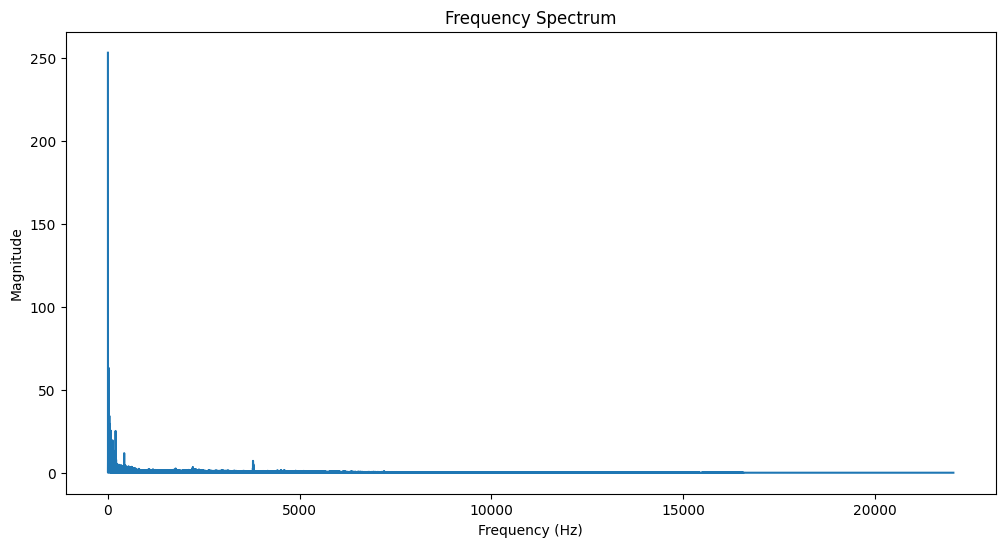

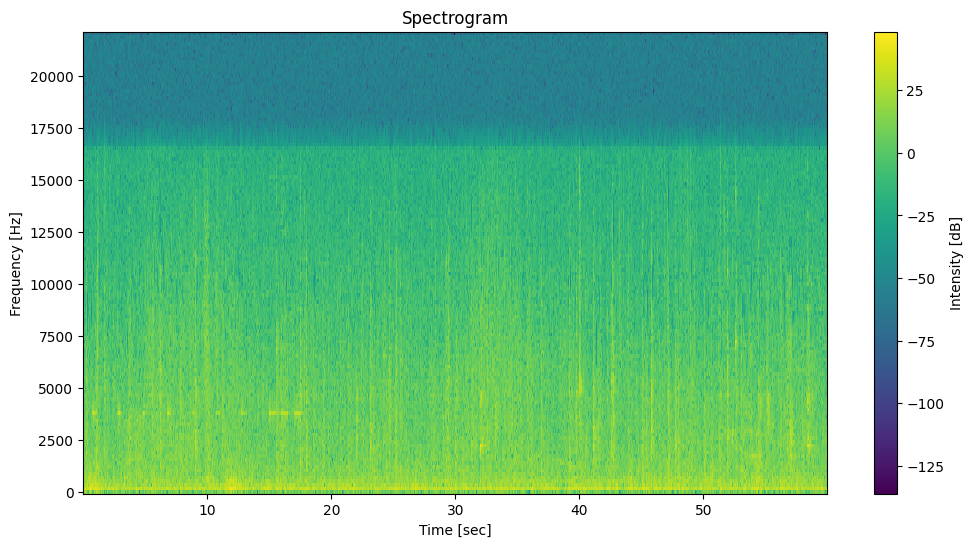

In [3]:
file_path = 'Audio_Work/birth_inference_minutes_wav/output_2023-10-09_06-33-01/output_2023-10-09_06-31-35.wav' 
waveform, frame_rate = load_audio(file_path)
plot_frequency_spectrum(waveform, frame_rate)
plot_spectrogram(waveform, frame_rate)


In [4]:
def load_audio(file_path):
    """ Load an audio file as a waveform and its frame rate. """
    with wave.open(file_path, 'r') as wav_file:
        frames = wav_file.readframes(-1)
        frame_rate = wav_file.getframerate()
        waveform = np.frombuffer(frames, dtype=np.int16)
    return waveform, frame_rate

def analyze_directory(directory_path):
    """ Analyze  audio files in a directory. """
    max_freq_file = ''
    min_freq_file = ''
    max_dom_freq = 0
    min_dom_freq = float('inf')
    total_dom_freq = 0
    sample_rates = []
    file_count = 0

    plt.figure(figsize=(12, 6))

    for filename in os.listdir(directory_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory_path, filename)
            waveform, frame_rate = load_audio(file_path)
            sample_rates.append(frame_rate)

            # Frequency Spectrum
            n = len(waveform)
            d = 1 / frame_rate
            frequencies = np.fft.rfftfreq(n, d)
            magnitude = np.abs(rfft(waveform)) / n
            plt.plot(frequencies, magnitude, label=filename)

            # Finding dominant frequency
            dominant_freq = frequencies[np.argmax(magnitude)]
            print(f"File: {filename}, Dominant Frequency: {dominant_freq} Hz")

            total_dom_freq += dominant_freq
            file_count += 1

            if dominant_freq > max_dom_freq:
                max_dom_freq = dominant_freq
                max_freq_file = filename

            if dominant_freq < min_dom_freq:
                min_dom_freq = dominant_freq
                min_freq_file = filename

    mean_dom_freq = total_dom_freq / file_count if file_count > 0 else 0

    # Plotting
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectra of Audio Files')
    plt.legend()
    plt.show()

    return mean_dom_freq, max_freq_file, min_freq_file, sample_rates



File: output_2023-11-04_06-23-38.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-24-38.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-25-38.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-26-38.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-27-38.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-28-38.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-29-38.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-30-38.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-31-38.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-32-37.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-33-37.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-34-37.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-35-37.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-36-37.wav, Dominant Frequency: 0.0 Hz
File: output_2023-11-04_06-37-37.wav, Dominant Frequency: 0.0 Hz


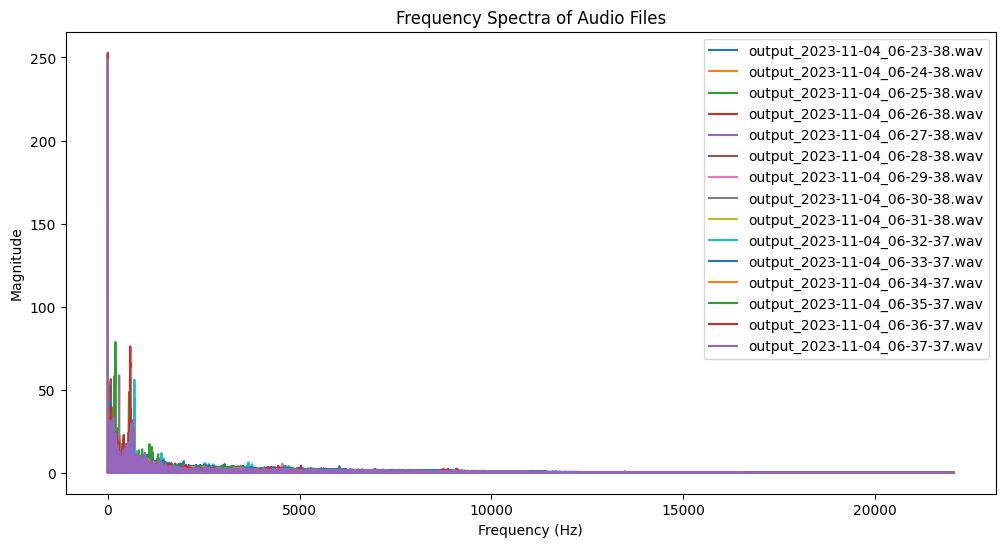

Mean Dominant Frequency: 0.0
File with Maximum Dominant Frequency: 
File with Minimum Dominant Frequency: output_2023-11-04_06-23-38.wav
Sample Rates: [44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100]


In [5]:
directory_path = 'Audio_Work/birth_inference_minutes_wav/output_2023-11-04_06-31-01'
mean_dom_freq, max_freq_file, min_freq_file, sample_rates = analyze_directory(directory_path)
print(f"Mean Dominant Frequency: {mean_dom_freq}")
print(f"File with Maximum Dominant Frequency: {max_freq_file}")
print(f"File with Minimum Dominant Frequency: {min_freq_file}")
print(f"Sample Rates: {sample_rates}")


253.24353480855746
253.1096021339251
253.71033938855012
252.6252524550116
253.22049934366532
253.67163539449496
253.12245556886373
253.96271224361456
252.661364571235
254.0180233226103
252.75959593592782
253.49984158742257
253.10126733927535
254.0658760188903
252.88761289259097


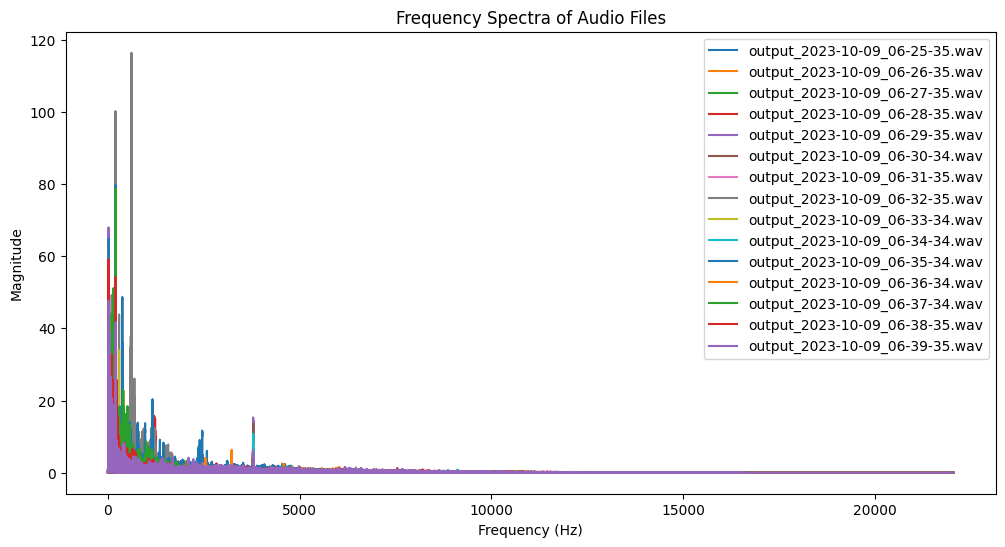

Mean Dominant Frequency: 98.7414646952832
File with Maximum Dominant Frequency: output_2023-10-09_06-32-35.wav
File with Minimum Dominant Frequency: output_2023-10-09_06-25-35.wav
Sample Rates: [44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100]


In [1]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import butter, filtfilt

def load_audio(file_path):
    """ Load an audio file as a waveform and its frame rate. """
    with wave.open(file_path, 'r') as wav_file:  # Open the WAV file
        frames = wav_file.readframes(-1)  # Read all frames from the file
        frame_rate = wav_file.getframerate()  # Get the frame rate of the audio
        # Handling stereo audio
        if wav_file.getnchannels() == 2:
            # Converting stereo to mono by averaging both channels
            waveform = np.frombuffer(frames, dtype=np.int16).reshape(-1, 2)
            waveform = waveform.mean(axis=1)
        else:
            # If mono, simply read the waveform data
            waveform = np.frombuffer(frames, dtype=np.int16)
    return waveform, frame_rate

def high_pass_filter(waveform, frame_rate, cutoff=10, order=5):
    """ Apply a high-pass filter to remove DC offset. """
    nyquist = 0.5 * frame_rate  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)  # Create a high-pass butterworth filter
    filtered_waveform = filtfilt(b, a, waveform)  # Apply the filter to the waveform
    return filtered_waveform

def estimate_dc_offset(waveform):
    """ Estimate the DC offset of the waveform. """
    return np.mean(waveform)

def analyze_directory(directory_path):
    """ Analyze all audio files in a directory. """
    max_freq_file = ''
    min_freq_file = ''
    max_dom_freq = 0
    min_dom_freq = float('inf')
    total_dom_freq = 0
    sample_rates = []
    file_count = 0
    anomaly_files = {0.25: [], 0.50: [], 0.75: [], 1.00: []}
    dominant_frequencies = []

    plt.figure(figsize=(12, 6))  

    for filename in os.listdir(directory_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory_path, filename)
            waveform, frame_rate = load_audio(file_path)
            sample_rates.append(frame_rate)

            dc_offset = estimate_dc_offset(waveform)
            print(dc_offset)
            filtered_waveform = high_pass_filter(waveform, frame_rate)

            # Frequency Spectrum
            n = len(filtered_waveform)
            d = 1 / frame_rate
            frequencies = rfftfreq(n, d)
            magnitude = np.abs(rfft(filtered_waveform)) / n
            plt.plot(frequencies, magnitude, label=filename)

            # Finding dominant frequency
            dominant_freq = frequencies[np.argmax(magnitude)]
            dominant_frequencies.append((filename, dominant_freq))
            total_dom_freq += dominant_freq
            file_count += 1

            if dominant_freq > max_dom_freq:
                max_dom_freq = dominant_freq
                max_freq_file = filename

            if dominant_freq < min_dom_freq:
                min_dom_freq = dominant_freq
                min_freq_file = filename

    mean_dom_freq = total_dom_freq / file_count if file_count > 0 else 0

    # Check for anomalies based on mean dominant frequency
    for filename, dominant_freq in dominant_frequencies:
        for threshold in anomaly_files.keys():
            if dominant_freq > mean_dom_freq * (1 + threshold):
                anomaly_files[threshold].append(filename)

    # Writing filenames to text files
    for threshold, filenames in anomaly_files.items():
        with open(f'Audio_Work/Threshold_logs/anomaly_files_{threshold}.txt', 'w') as file:
            for name in filenames:
                file.write(name + '\n')

    # Plotting
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectra of Audio Files')
    plt.legend()
    plt.show()

    return mean_dom_freq, max_freq_file, min_freq_file, sample_rates

# Example usage
directory_path = 'Audio_Work/birth_inference_minutes_wav/output_2023-10-09_06-33-01'
mean_dom_freq, max_freq_file, min_freq_file, sample_rates = analyze_directory(directory_path)
print(f"Mean Dominant Frequency: {mean_dom_freq}")
print(f"File with Maximum Dominant Frequency: {max_freq_file}")
print(f"File with Minimum Dominant Frequency: {min_freq_file}")
print(f"Sample Rates: {sample_rates}")


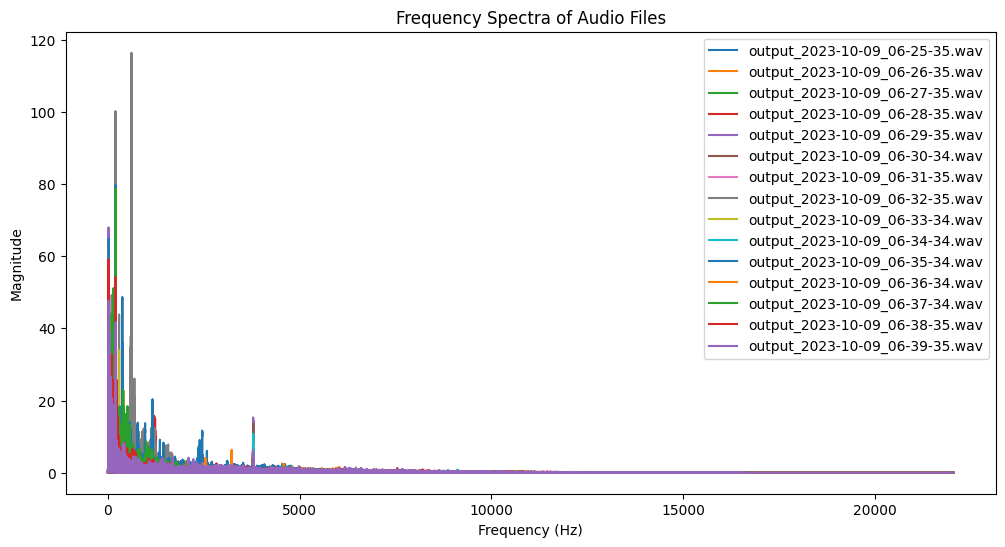

Mean Dominant Frequency: 98.7414646952832
File with Maximum Dominant Frequency: output_2023-10-09_06-32-35.wav
File with Minimum Dominant Frequency: output_2023-10-09_06-25-35.wav
Sample Rates: [44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100]


In [13]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq
from scipy.signal import butter, filtfilt

def load_audio(file_path):
    """ Load an audio file as a waveform and its frame rate. """
    with wave.open(file_path, 'r') as wav_file:  # Open the WAV file
        frames = wav_file.readframes(-1)  # Read all frames from the file
        frame_rate = wav_file.getframerate()  # Get the frame rate of the audio
        # Handling stereo audio
        if wav_file.getnchannels() == 2:
            # Converting stereo to mono by averaging both channels
            waveform = np.frombuffer(frames, dtype=np.int16).reshape(-1, 2)
            waveform = waveform.mean(axis=1)
        else:
            # If mono, simply read the waveform data
            waveform = np.frombuffer(frames, dtype=np.int16)
    return waveform, frame_rate

def high_pass_filter(waveform, frame_rate, cutoff=10, order=5):
    """ Apply a high-pass filter to remove DC offset. """
    nyquist = 0.5 * frame_rate  # Nyquist frequency
    normal_cutoff = cutoff / nyquist  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)  # Create a high-pass butterworth filter
    filtered_waveform = filtfilt(b, a, waveform)  # Apply the filter to the waveform
    return filtered_waveform

def estimate_dc_offset(waveform):
    """ Estimate the DC offset of the waveform. """
    return np.mean(waveform)

def plot_trio_spectrograms(file_trio, directory_path, threshold, index):
    """ Plot spectrograms of the trio of files in a vertical stack and save the plot. """
    plt.figure(figsize=(15, 15))  # Adjust the figure size for vertical stacking

    for i, filename in enumerate(file_trio):
        if filename:
            waveform, frame_rate = load_audio(os.path.join(directory_path, filename))
            filtered_waveform = high_pass_filter(waveform, frame_rate)

            # Generate a spectrogram
            f, t, Sxx = spectrogram(filtered_waveform, fs=frame_rate, nperseg=1024, noverlap=512)
            Sxx_log = np.log(Sxx + 1e-6)  # Logarithmic scale

            plt.subplot(3, 1, i + 1)  # Change to 3 rows and 1 column
            plt.imshow(Sxx_log, aspect='auto', origin='lower', cmap='inferno', extent=[t.min(), t.max(), f.min(), f.max()])
            plt.colorbar(format='%+2.0f dB')
            plt.xlabel('Time (sec)')
            plt.ylabel('Frequency (Hz)')
            plt.title(filename)

    # Extracting date part from the filename and creating the output filename
    date_part = file_trio[1].split('_')[1]  
    output_filename = f'Audio_Work/Threshold_plots/{threshold}_{date_part}_{index}.png'
    plt.tight_layout()
    plt.savefig(output_filename)
    plt.close()


def analyze_directory(directory_path):
    """ Analyze all audio files in a directory. """
    max_freq_file = ''
    min_freq_file = ''
    max_dom_freq = 0
    min_dom_freq = float('inf')
    total_dom_freq = 0
    sample_rates = []
    file_count = 0
    anomaly_files = {0.25: [], 0.50: [], 0.75: [], 1.00: []}
    dominant_frequencies = []
    filenames_list = []  # List to keep track of filenames for anomaly detection

    plt.figure(figsize=(12, 6))  

    for filename in os.listdir(directory_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(directory_path, filename)
            waveform, frame_rate = load_audio(file_path)
            sample_rates.append(frame_rate)

            dc_offset = estimate_dc_offset(waveform)
            filtered_waveform = high_pass_filter(waveform, frame_rate)

            # Frequency Spectrum
            n = len(filtered_waveform)
            d = 1 / frame_rate
            frequencies = rfftfreq(n, d)
            magnitude = np.abs(rfft(filtered_waveform)) / n
            plt.plot(frequencies, magnitude, label=filename)

            # Finding dominant frequency
            dominant_freq = frequencies[np.argmax(magnitude)]
            dominant_frequencies.append((filename, dominant_freq))
            filenames_list.append(filename)  # Append the filename to the list
            total_dom_freq += dominant_freq
            file_count += 1

            if dominant_freq > max_dom_freq:
                max_dom_freq = dominant_freq
                max_freq_file = filename

            if dominant_freq < min_dom_freq:
                min_dom_freq = dominant_freq
                min_freq_file = filename

    mean_dom_freq = total_dom_freq / file_count if file_count > 0 else 0

    # Check for anomalies and include adjacent filenames
    for i, (filename, dominant_freq) in enumerate(dominant_frequencies):
        for threshold in anomaly_files.keys():
            if dominant_freq > mean_dom_freq * (1 + threshold):
                prev_file = filenames_list[i - 1] if i > 0 else None
                next_file = filenames_list[i + 1] if i < len(filenames_list) - 1 else None
                file_trio = [prev_file, filename, next_file]
                anomaly_index = len(anomaly_files[threshold])
                anomaly_files[threshold].append(file_trio)

                # Plot and save spectrograms of the trio with index
                plot_trio_spectrograms(file_trio, directory_path, threshold, anomaly_index)

    # Writing filenames to text files
    for threshold, file_trios in anomaly_files.items():
        with open(f'Audio_Work/Threshold_logs/anomaly_files_{threshold}.txt', 'w') as file:
            for trio in file_trios:
                file.write(','.join([name if name else '' for name in trio]) + '\n')

    # Plotting
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Frequency Spectra of Audio Files')
    plt.legend()
    plt.show()

    return mean_dom_freq, max_freq_file, min_freq_file, sample_rates


# Example usage
directory_path = 'Audio_Work/birth_inference_minutes_wav/output_2023-10-09_06-33-01'
mean_dom_freq, max_freq_file, min_freq_file, sample_rates = analyze_directory(directory_path)
print(f"Mean Dominant Frequency: {mean_dom_freq}")
print(f"File with Maximum Dominant Frequency: {max_freq_file}")
print(f"File with Minimum Dominant Frequency: {min_freq_file}")
print(f"Sample Rates: {sample_rates}")
